In [ ]:
pip install scikit-learn==1.1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.0/32.0 MB 23.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.1.3 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.1.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


import missingno as msno
import plotly.express as px
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
df = pd.read_csv("heart_disease.csv")
df.shape

(10000, 21)

##Data Exploration

In [ ]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,Yes,No,Medium,7.633228,Medium,342.0,120.0,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,Yes,No,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,Yes,Yes,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,No,Yes,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,No,No,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  object 
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  object 
 5   Smoking               10000 non-null  object 
 6   Family Heart Disease  10000 non-null  object 
 7   Diabetes              10000 non-null  object 
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  object 
 10  Low HDL Cholesterol   10000 non-null  object 
 11  High LDL Cholesterol  10000 non-null  object 
 12  Stress Level          10000 non-null  object 
 13  Sleep Hours           10000 non-null  float64
 14  Sugar Consumption     10000 non-null  object 
 15  Triglyceride Level  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,49.295400,18.167574,18.000000,34.000000,49.000000,65.000000,80.000000
Blood Pressure,10000.0,149.758200,17.556268,120.000000,134.000000,150.000000,165.000000,180.000000
Cholesterol Level,10000.0,225.427300,43.510401,150.000000,187.000000,226.000000,263.000000,300.000000
BMI,10000.0,29.077274,6.300156,18.002837,23.668887,29.079492,34.509009,39.996954
Sleep Hours,10000.0,6.991359,1.751002,4.000605,5.455288,7.003252,8.527938,9.999952
Triglyceride Level,10000.0,250.732500,86.953962,100.000000,176.000000,250.000000,326.000000,400.000000
Fasting Blood Sugar,10000.0,120.141900,23.558053,80.000000,99.000000,120.000000,141.000000,160.000000
CRP Level,10000.0,7.472200,4.334601,0.003647,3.681800,7.472164,11.244879,14.997087
Homocysteine Level,10000.0,12.456177,4.319100,5.000236,8.729771,12.409395,16.130968,19.999037


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


In [ ]:
missing_count = df.isnull().sum()
missing_percentage = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage})
print(missing_df.sort_values(by='Missing Percentage', ascending=False))

                      Missing Count  Missing Percentage
Age                               0                 0.0
Gender                            0                 0.0
Homocysteine Level                0                 0.0
CRP Level                         0                 0.0
Fasting Blood Sugar               0                 0.0
Triglyceride Level                0                 0.0
Sugar Consumption                 0                 0.0
Sleep Hours                       0                 0.0
Stress Level                      0                 0.0
High LDL Cholesterol              0                 0.0
Low HDL Cholesterol               0                 0.0
High Blood Pressure               0                 0.0
BMI                               0                 0.0
Diabetes                          0                 0.0
Family Heart Disease              0                 0.0
Smoking                           0                 0.0
Exercise Habits                   0             

<Axes: >

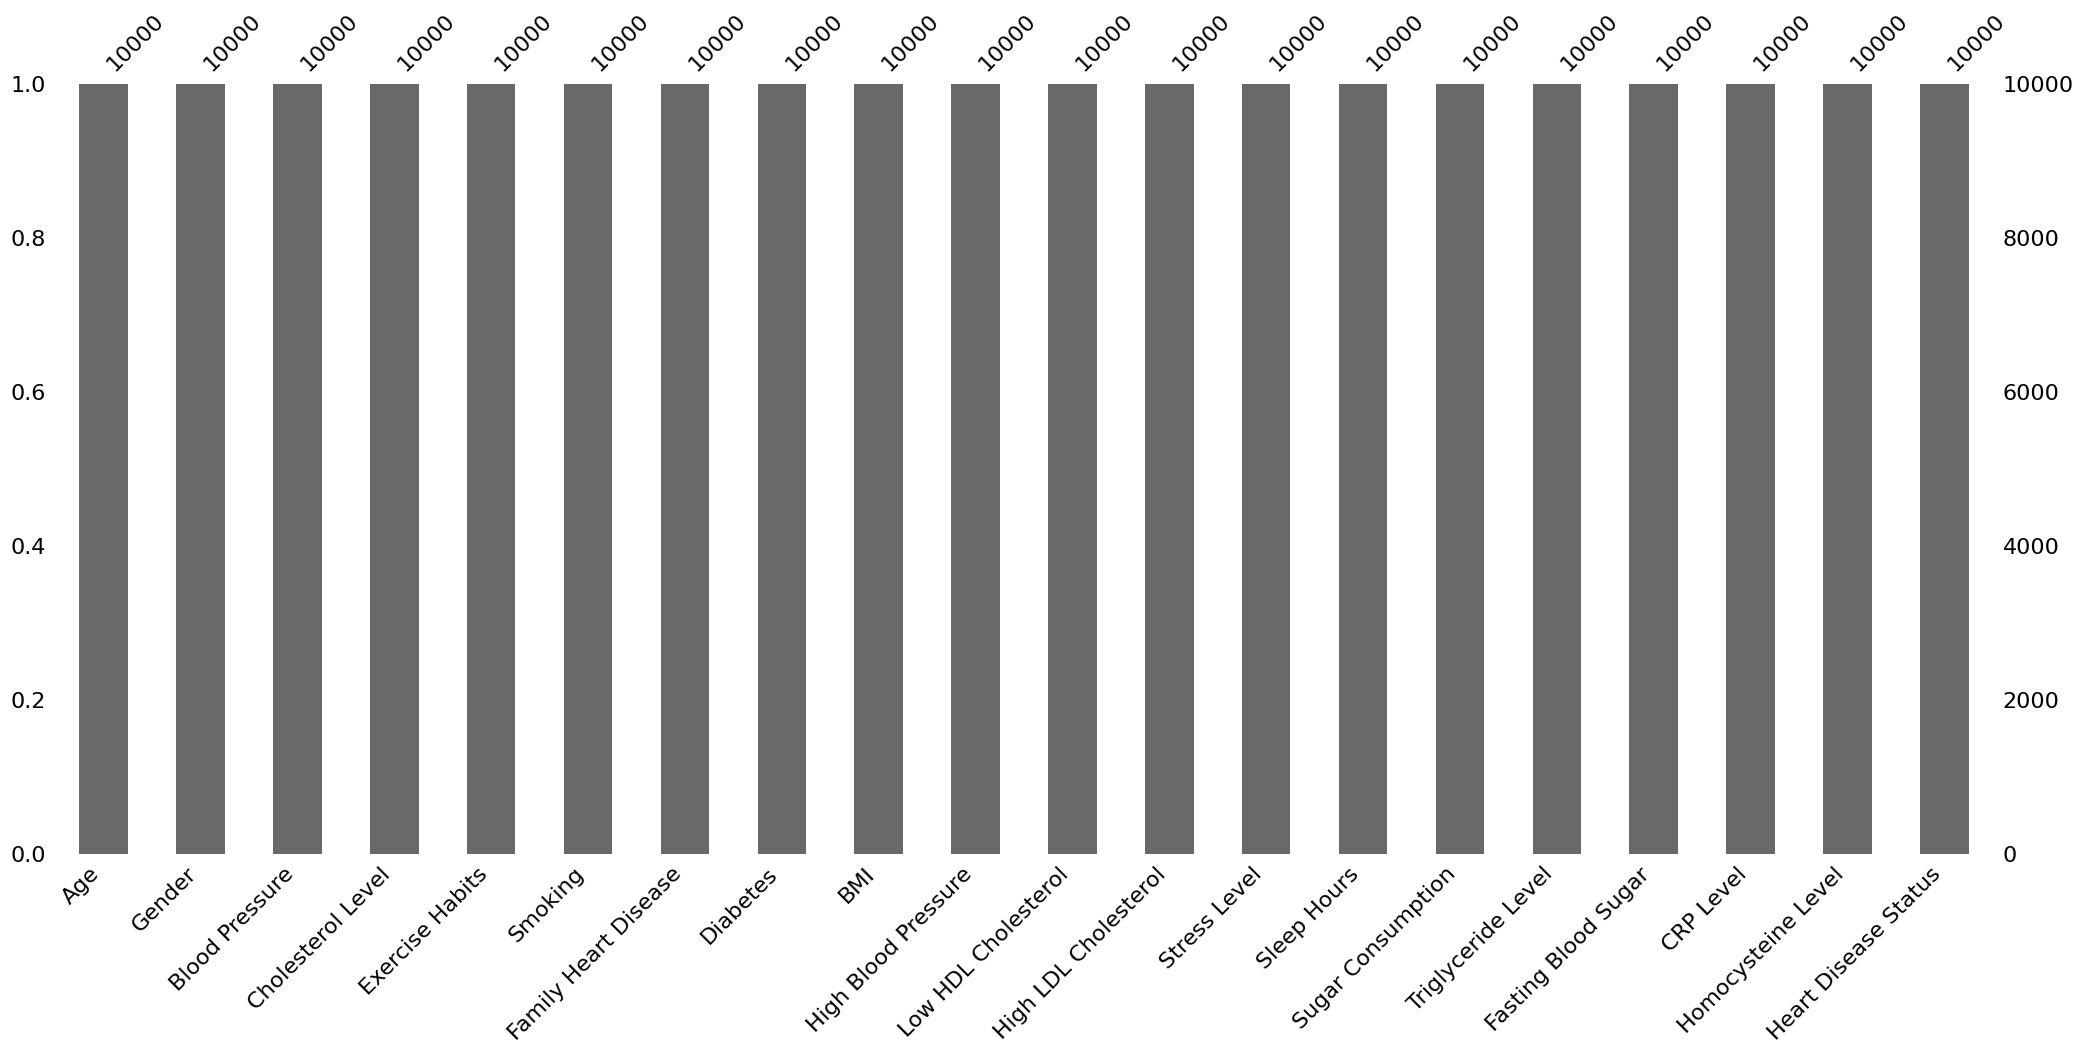

In [ ]:
import missingno as msno
msno.bar(df)

The number of variables in the Alcohol Consumption column is much lower than the rest.

- Missing Value

In [ ]:
numerical_columns = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI',
                     'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
                     'Homocysteine Level','Sleep Hours']

for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-32-a1f46edf157d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
categorical_columns = ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
                       'High Blood Pressure', 'Low HDL Cholesterol',
                       'High LDL Cholesterol',
                       'Stress Level', 'Sugar Consumption','Diabetes']


for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-33-1f779db3d402>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
#drop column Alcohol consumption

df = df.drop('Alcohol Consumption', axis=1)


KeyError: "['Alcohol Consumption'] not found in axis"

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


- Outlier

In [ ]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'{col} column: {len(outliers)} outliers')

Age column: 0 outliers
Blood Pressure column: 0 outliers
Cholesterol Level column: 0 outliers
BMI column: 0 outliers
Triglyceride Level column: 0 outliers
Fasting Blood Sugar column: 0 outliers
CRP Level column: 0 outliers
Homocysteine Level column: 0 outliers
Sleep Hours column: 0 outliers


- Graph

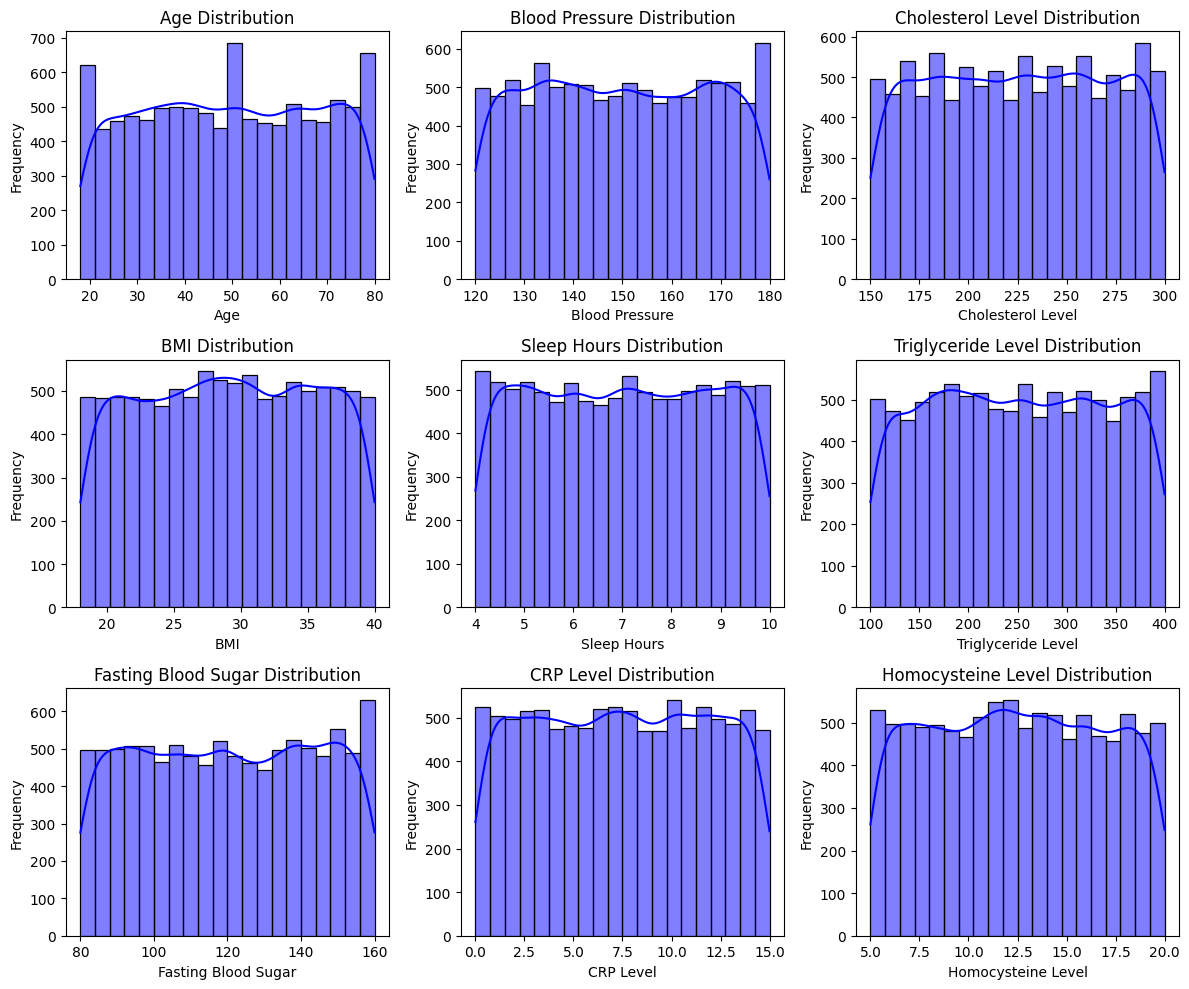

In [ ]:
numeric_columns = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI','Sleep Hours' ,'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']


plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color="blue", bins=20)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-38-4cc6e860eb06>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=[colors[i-1]])
<ipython-input-38-4cc6e860eb06>:12: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=df, palette=[colors[i-1]])
<ipython-input-38-4cc6e860eb06>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=[colors[i-1]])
<ipython-input-38-4cc6e860eb06>:12: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=df, palette=[colors[i-1]])
<ipython-input-3

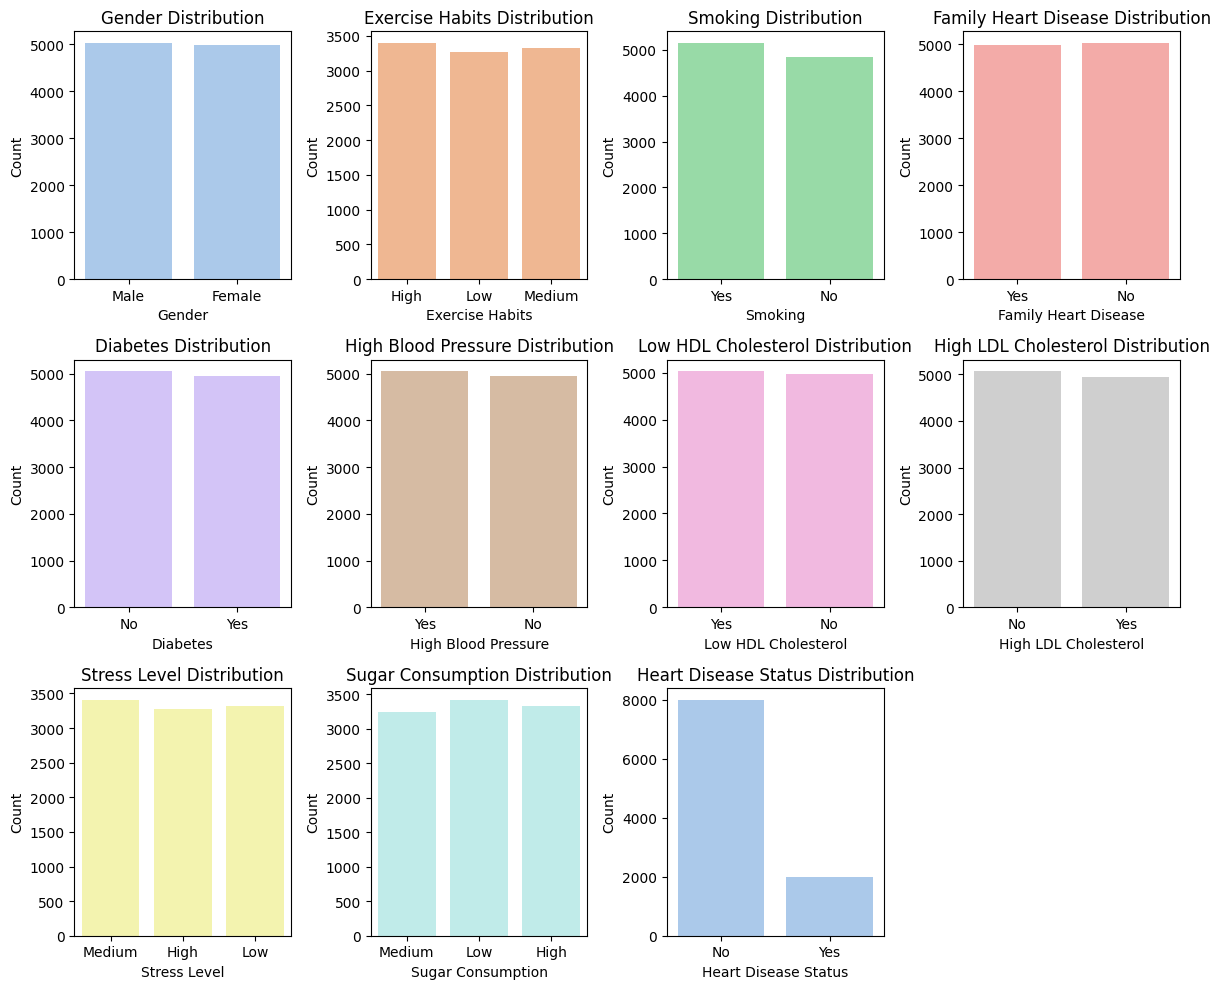

In [ ]:
categorical_columns = ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes',
                       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
                        'Stress Level', 'Sugar Consumption','Heart Disease Status']


colors = sns.color_palette("pastel", len(categorical_columns))


plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=col, data=df, palette=[colors[i-1]])
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

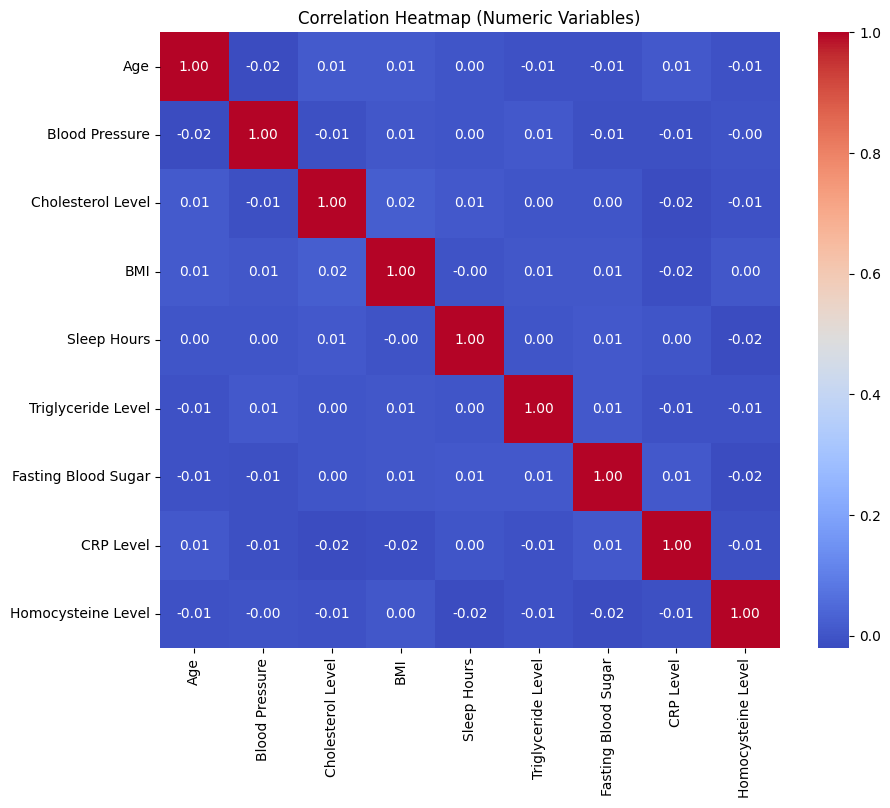

In [ ]:
# Selecting numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    numeric_cols.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()

In [ ]:
# Process categorical variables
df_processed = df.copy()

# 1. Process binary categorical variables (Male/Female, Yes/No)
binary_mapping = {
    'Gender': {'Male': 1, 'Female': 0},
    'Family Heart Disease': {'Yes': 1, 'No': 0},
    'Diabetes': {'Yes': 1, 'No': 0},
    'Smoking': {'Yes': 1, 'No': 0}
}

# Apply binary mappings
for col, mapping in binary_mapping.items():
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map(mapping)

## Test Importance Columns

In [ ]:
df_processed

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1,153.0,155.0,High,1,1,0,24.991591,Yes,Yes,No,Medium,7.633228,Medium,342.0,120.0,12.969246,12.387250,No
1,69.0,0,146.0,286.0,High,0,1,1,25.221799,No,Yes,No,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,1,126.0,216.0,Low,0,0,0,29.855447,No,Yes,Yes,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,0,122.0,293.0,High,1,1,0,24.130477,Yes,No,Yes,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,1,166.0,242.0,Low,1,1,1,20.486289,Yes,No,No,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,0,136.0,243.0,Medium,1,0,0,18.788791,Yes,No,Yes,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,1,172.0,154.0,Medium,0,0,0,31.856801,Yes,No,Yes,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,1,152.0,201.0,High,1,0,1,26.899911,No,Yes,Yes,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,1,142.0,299.0,Low,1,0,1,34.964026,Yes,No,Yes,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [ ]:
columns_to_remove = [
    'High Blood Pressure',
    'Low HDL Cholesterol',
    'High LDL Cholesterol',
    'Sugar Consumption',
    'Sleep Hours',
    'Stress Level',
    'Exercise Habits'
]

df_processed = df_processed.drop(columns= columns_to_remove)
df_processed

,Age,Gender,Blood Pressure,Cholesterol Level,Smoking,Family Heart Disease,Diabetes,BMI,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1,153.0,155.0,1,1,0,24.991591,342.0,120.0,12.969246,12.387250,No
1,69.0,0,146.0,286.0,0,1,1,25.221799,133.0,157.0,9.355389,19.298875,No
2,46.0,1,126.0,216.0,0,0,0,29.855447,393.0,92.0,12.709873,11.230926,No
3,32.0,0,122.0,293.0,1,1,0,24.130477,293.0,94.0,12.509046,5.961958,No
4,60.0,1,166.0,242.0,1,1,1,20.486289,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,0,136.0,243.0,1,0,0,18.788791,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,1,172.0,154.0,0,0,0,31.856801,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,1,152.0,201.0,1,0,1,26.899911,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,1,142.0,299.0,1,0,1,34.964026,113.0,153.0,7.215634,11.873486,Yes


- Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X = df_processed.drop(columns=['Heart Disease Status'])  # Features
y = df_processed['Heart Disease Status'] # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Huấn luyện mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Lấy trọng số quan trọng của từng biến
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Hiển thị kết quả
print("📌 Feature Importance từ Random Forest:")
print(feature_importance)


📌 Feature Importance từ Random Forest:
Homocysteine Level      0.129977
CRP Level               0.129458
BMI                     0.128644
Triglyceride Level      0.120707
Cholesterol Level       0.113913
Fasting Blood Sugar     0.104764
Age                     0.102639
Blood Pressure          0.101914
Family Heart Disease    0.018161
Smoking                 0.017778
Diabetes                0.017388
Gender                  0.014656
dtype: float64


Columns that maybe are dropp

1.   Family Heart Disease
2.   Smoking
3.   Diabetes
4.   Gender



- Mutual Information : Bất thường vì có nhiều biến = 0



In [ ]:
criteria_cols = ['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level',]
df_ewm = df_processed[criteria_cols]

df_norm = (df_ewm - df_ewm.min()) / (df_ewm.max() - df_ewm.min())

P = df_norm / df_norm.sum(axis=0)

k = 1 / np.log(len(df_processed))
E = -k * (P * np.log(P + 1e-10)).sum(axis=0)  # Thêm 1e-10 để tránh log(0)

W = (1 - E) / (1 - E).sum()

weights = pd.DataFrame({"Criteria": criteria_cols, "Weight": W})
print(weights)

                                  Criteria    Weight
Age                                    Age  0.045612
Gender                              Gender  0.159434
Blood Pressure              Blood Pressure  0.047051
Cholesterol Level        Cholesterol Level  0.044772
Smoking                            Smoking  0.153698
Family Heart Disease  Family Heart Disease  0.161610
Diabetes                          Diabetes  0.162683
BMI                                    BMI  0.043560
Triglyceride Level      Triglyceride Level  0.044641
Fasting Blood Sugar    Fasting Blood Sugar  0.046605
CRP Level                        CRP Level  0.045281
Homocysteine Level      Homocysteine Level  0.045053


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Tính MI Score
mi_scores = mutual_info_classif(X_train, y_train)
mi_scores_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

# Hiển thị kết quả
print("📌 Mutual Information Score:")
print(mi_scores_series)


📌 Mutual Information Score:
Cholesterol Level       0.003530
Age                     0.003515
Smoking                 0.002038
BMI                     0.000820
Gender                  0.000588
Blood Pressure          0.000000
Family Heart Disease    0.000000
Diabetes                0.000000
Triglyceride Level      0.000000
Fasting Blood Sugar     0.000000
CRP Level               0.000000
Homocysteine Level      0.000000
dtype: float64


- Drop  Homocysteine Level

In [ ]:
df_processed = df_processed.drop(columns=['Homocysteine Level'])

In [ ]:
df_processed

,Age,Gender,Blood Pressure,Cholesterol Level,Smoking,Family Heart Disease,Diabetes,BMI,Triglyceride Level,Fasting Blood Sugar,CRP Level,Heart Disease Status
0,56.0,1,153.0,155.0,1,1,0,24.991591,342.0,120.0,12.969246,No
1,69.0,0,146.0,286.0,0,1,1,25.221799,133.0,157.0,9.355389,No
2,46.0,1,126.0,216.0,0,0,0,29.855447,393.0,92.0,12.709873,No
3,32.0,0,122.0,293.0,1,1,0,24.130477,293.0,94.0,12.509046,No
4,60.0,1,166.0,242.0,1,1,1,20.486289,263.0,154.0,10.381259,No
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,0,136.0,243.0,1,0,0,18.788791,343.0,133.0,3.588814,Yes
9996,38.0,1,172.0,154.0,0,0,0,31.856801,377.0,83.0,2.658267,Yes
9997,73.0,1,152.0,201.0,1,0,1,26.899911,248.0,88.0,4.408867,Yes
9998,23.0,1,142.0,299.0,1,0,1,34.964026,113.0,153.0,7.215634,Yes


## Apply Combine model
- Muhammed: CLIP3, CLIP4, CLIP4 ensemble
https://ieeexplore.ieee.org/abstract/document/6396533

- SVM, Decision Tree, Logistic Regression https://www.researchgate.net/profile/Mythili-Thirugnanam/publication/273261237_A_Heart_Disease_Prediction_Model_using_SVM-Decision_Trees-Logistic_Regression_SDL/links/5cd3c7bf92851c4eab8c563b/A-Heart-Disease-Prediction-Model-using-SVM-Decision-Trees-Logistic-Regression-SDL.pdf#page=5.70

- Decision Tree+ Random Forest https://ieeexplore.ieee.org/abstract/document/9358597

- Knn 10.1109/ICE348803.2020.9122958

